In [1]:
from resspect import get_snpcc_metric
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [49]:
nsamp = 3000
field = 'DDF'

total_num = {}
total_num['DDF'] = {}
total_num['DDF']['all'] = 10228
total_num['DDF']['Ia'] = 8613
total_num['DDF']['others'] = total_num['DDF']['all'] - total_num['DDF']['Ia']
total_num['WFD'] = {}
total_num['WFD']['all'] = 1094829
total_num['WFD']['Ia'] = 999789
total_num['WFD']['others'] = total_num['WFD']['all'] - total_num['WFD']['Ia']

In [50]:
max_cont = total_num[field]['others']/nsamp

print('Maximum possible contamination: ', max_cont)

Maximum possible contamination:  0.5383333333333333


In [51]:
cont_axis = np.arange(0.01, 1, 0.01)

metrics = []

for c in cont_axis:

    ccIa = int(nsamp * (1 - c))
    wcIa = total_num[field]['Ia'] - ccIa

    wcOther = int(nsamp * c)
    ccOther = total_num[field]['others'] - wcOther
    if wcOther <= nsamp and ccOther >= 0:
        

        eff = ccIa/total_num[field]['Ia']
        acc = (ccIa + ccOther)/total_num[field]['all']
        pur = ccIa/(ccIa + wcOther)
        fom = eff + ccIa/(ccIa + 3*wcOther)

        line = [acc, eff, pur, fom, ccIa, wcIa, ccOther, wcOther, c]
        metrics.append(line)

metrics_res = pd.DataFrame(metrics, columns=['acc', 'eff', 'pur', 'fom', 'ccIa', 'wcIa', 'ccOther', 'wcOther', 'cont'])

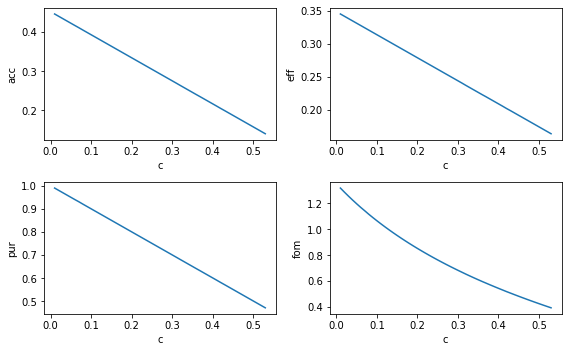

In [52]:
plt.figure(figsize=(8, 5))

for i in range(4):
    name = list(metrics_res.keys())[i]
    plt.subplot(2,2, i + 1)
    plt.plot(metrics_res['cont'], metrics_res[name])
    plt.xlabel('c')
    plt.ylabel(name)
    
plt.tight_layout()
plt.show()

In [53]:
metrics_res.shape

(53, 9)

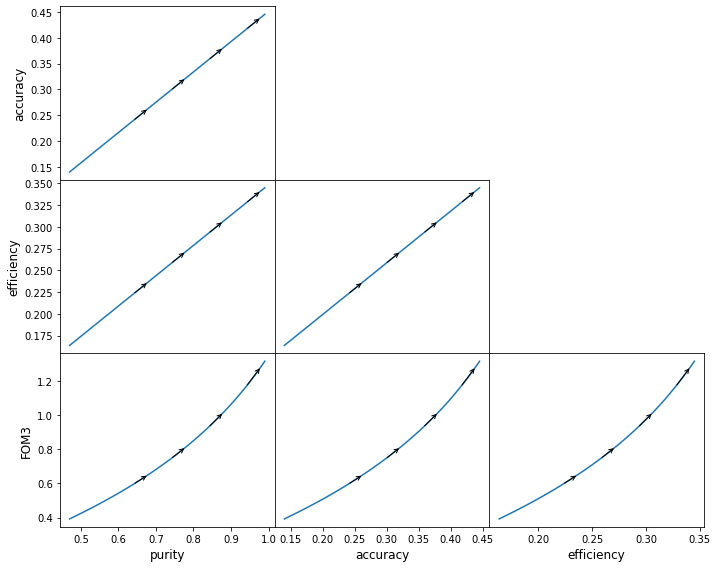

In [54]:
step = 4
fs=12
pos_list = np.arange(1, min(50, metrics_res.shape[0]), 10)

plt.figure(figsize=(10, 8))

ax1 = plt.subplot(3,3, 1)
plt.plot(metrics_res['pur'], metrics_res['acc'])
for indx1 in pos_list[:-1]:
    ax1.annotate("", xy=(metrics_res.iloc[indx1]['pur'], metrics_res.iloc[indx1]['acc']), 
                 xytext=(metrics_res.iloc[indx1 + step]['pur'], metrics_res.iloc[indx1 + step]['acc']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xticks([])
plt.ylabel('accuracy', fontsize=fs)

ax4 = plt.subplot(3,3, 4)
plt.plot(metrics_res['pur'], metrics_res['eff'])
for indx1 in pos_list[:-1]:
    ax4.annotate("", xy=(metrics_res.iloc[indx1]['pur'], metrics_res.iloc[indx1]['eff']), 
                 xytext=(metrics_res.iloc[indx1 + step]['pur'], metrics_res.iloc[indx1 + step]['eff']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xticks([])
plt.ylabel('efficiency', fontsize=fs)

ax5 = plt.subplot(3,3, 5)
plt.plot(metrics_res['acc'], metrics_res['eff'])
for indx1 in pos_list[:-1]:
    ax5.annotate("", xy=(metrics_res.iloc[indx1]['acc'], metrics_res.iloc[indx1]['eff']), 
                 xytext=(metrics_res.iloc[indx1 + step]['acc'], metrics_res.iloc[indx1 + step]['eff']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xticks([])
plt.yticks([])

ax7 = plt.subplot(3,3, 7)
plt.plot(metrics_res['pur'], metrics_res['fom'])
for indx1 in pos_list[:-1]:
    ax7.annotate("", xy=(metrics_res.iloc[indx1]['pur'], metrics_res.iloc[indx1]['fom']), 
                 xytext=(metrics_res.iloc[indx1 + step]['pur'], metrics_res.iloc[indx1 + step]['fom']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.ylabel('FOM3', fontsize=fs)
plt.xlabel('purity', fontsize=fs)


ax5 = plt.subplot(3,3, 8)
plt.plot(metrics_res['acc'], metrics_res['fom'])
for indx1 in pos_list[:-1]:
    ax5.annotate("", xy=(metrics_res.iloc[indx1]['acc'], metrics_res.iloc[indx1]['fom']), 
                 xytext=(metrics_res.iloc[indx1 + step]['acc'], metrics_res.iloc[indx1 + step]['fom']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xlabel('accuracy', fontsize=fs)
plt.yticks([])

ax6 = plt.subplot(3,3, 9)
plt.plot(metrics_res['eff'], metrics_res['fom'])

for indx1 in pos_list[:-1]:
    ax6.annotate("", xy=(metrics_res.iloc[indx1]['eff'], metrics_res.iloc[indx1]['fom']), 
                 xytext=(metrics_res.iloc[indx1 + step]['eff'], metrics_res.iloc[indx1 + step]['fom']),
                 arrowprops={'arrowstyle': "->", 'facecolor':'black'})
plt.xlabel('efficiency', fontsize=fs)
plt.yticks([])

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
#plt.savefig('simple_metrics.pdf')
plt.show()

In [56]:
metrics_res

,acc,eff,pur,fom,ccIa,wcIa,ccOther,wcOther,cont
0,0.445346,0.344828,0.990000,1.315416,2970,5643,1585,30,0.01
1,0.439480,0.341344,0.980000,1.283652,2940,5673,1555,60,0.02
2,0.433614,0.337861,0.970000,1.252956,2910,5703,1525,90,0.03
3,0.427747,0.334378,0.960000,1.223267,2880,5733,1495,120,0.04
4,0.421881,0.330895,0.950000,1.194532,2850,5763,1465,150,0.05
5,0.416015,0.327412,0.940000,1.166698,2820,5793,1435,180,0.06
6,0.410246,0.323929,0.930310,1.140435,2790,5823,1406,209,0.07
7,0.404282,0.320446,0.920000,1.113549,2760,5853,1375,240,0.08
8,0.398416,0.316963,0.910000,1.088149,2730,5883,1345,270,0.09
9,0.392550,0.313480,0.900000,1.063480,2700,5913,1315,300,0.10
